# **Project 1 - Customer Service Requests Analysis.ipynb**

**DESCRIPTION**

**Background of Problem Statement :** NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

**Problem Objective :** Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

**Analysis Tasks to be performed:**

(Perform a service request data analysis of New York City 311 calls) 

    Import a 311 NYC service request.
    Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
    Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
    Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
    Perform a statistical test for the following:

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

    Whether the average response time across complaint types is similar or not (overall)
    Are the type of complaint or service requested and location related?


**Dataset Description :**
Field 	Description

Unique Key 	(Plain text) - Unique identifier for the complaints

Created Date 	(Date and Time) - The date and time on which the complaint is raised

Closed Date 	(Date and Time)  - The date and time on which the complaint is closed

Agency 	(Plain text) - Agency code

Agency Name 	(Plain text) - Name of the agency

Complaint Type 	(Plain text) - Type of the complaint

Descriptor 	(Plain text) - Complaint type label (Heating - Heat, Traffic Signal Condition - Controller)

Location Type 	(Plain text) - Type of the location (Residential, Restaurant, Bakery, etc)

Incident Zip 	(Plain text) - Zip code for the location

Incident Address 	(Plain text) - Address of the location

Street Name 	(Plain text) - Name of the street

Cross Street 1 	(Plain text) - Detail of cross street

Cross Street 2 	(Plain text) - Detail of another cross street

Intersection Street 1 	(Plain text) - Detail of intersection street if any

Intersection Street 2 	(Plain text) - Detail of another intersection street if any

Address Type 	(Plain text) - Categorical (Address or Intersection)

City 	(Plain text) - City for the location

Landmark 	(Plain text) - Empty field

Facility Type 	(Plain text) - N/A

Status 	(Plain text) - Categorical (Closed or Pending)

Due Date 	(Date and Time) - Date and time for the pending complaints

Resolution Action Updated Date 	(Date and Time) - Date and time when the resolution was provided

Community Board 	(Plain text) - Categorical field (specifies the community board with its code)

Borough 	(Plain text) - Categorical field (specifies the community board)

X Coordinate 	(State Plane) (Number)

Y Coordinate 	(State Plane) (Number)

Park Facility Name 	(Plain text) - Unspecified

Park Borough 	(Plain text) - Categorical (Unspecified, Queens, Brooklyn etc)

School Name 	(Plain text) - Unspecified

School Number 	(Plain text)  - Unspecified

School Region 	(Plain text)  - Unspecified

School Code 	(Plain text)  - Unspecified

School Phone Number 	(Plain text)  - Unspecified

School Address 	(Plain text)  - Unspecified

School City 	(Plain text)  - Unspecified

School State 	(Plain text)  - Unspecified

School Zip 	(Plain text)  - Unspecified

School Not Found 	(Plain text)  - Empty Field

School or Citywide Complaint 	(Plain text)  - Empty Field

Vehicle Type 	(Plain text)  - Empty Field

Taxi Company Borough 	(Plain text)  - Empty Field

Taxi Pick Up Location 	(Plain text)  - Empty Field

Bridge Highway Name 	(Plain text)  - Empty Field

Bridge Highway Direction 	(Plain text)  - Empty Field

Road Ramp 	(Plain text)  - Empty Field

Bridge Highway Segment 	(Plain text)  - Empty Field

Garage Lot Name 	(Plain text)  - Empty Field
 
Ferry Direction 	(Plain text)  - Empty Field

Ferry Terminal Name 	(Plain text)  - Empty Field

Latitude 	(Number) - Latitude of the location

Longitude 	(Number) - Longitude of the location

Location 	(Location) - Coordinates (Latitude, Longitude)

In [236]:
import pandas as pd

In [237]:
filepath = '/content/drive/MyDrive/My Projects/Simplilearn/01 Data Science with Python/Project 1 - Customer Service Requests Analysis/311_Service_Requests_from_2010_to_Present.csv'

In [238]:
dataset = pd.read_csv(filepath, parse_dates=["Created Date", "Closed Date"], low_memory=False)

In [239]:
dataset.shape

(300698, 53)

In [240]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [241]:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [242]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  datetime64[ns]
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

In [243]:
dataset.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [244]:
dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 0:55,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded to the complai...,01-01-16 1:26,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,VALENTINE AVENUE,EAST 198 STREET,EAST 199 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:59,The Police Department responded and upon arriv...,01-01-16 4:51,07 BRONX,BRONX,1015081.0,256380.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,BAISLEY AVENUE,EDISON AVENUE,B STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,01-01-16 7:57,The Police Department responded to the complai...,01-01-16 7:43,10 BRONX,BRONX,1031740.0,243899.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,57 ROAD,SEABURY STREET,HOFFMAN DRIVE,NaN,NaN,ADDRESS,ELMHURST,NaN,Precinct,Closed,01-01-16 7:56,The Police Department responded and upon arriv...,01-01-16 3:24,04 QUEENS,QUEENS,1019123.0,206375.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


**Handling Missing Values**

In [245]:
dataset.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [246]:
dataset.shape

(300698, 53)

since the following columns all all empty we are dropping them all.

'School or Citywide Complaint',
'Vehicle Type',
'Taxi Company Borough',
'Taxi Pick Up Location',
'Bridge Highway Name',
'Bridge Highway Direction',
'Road Ramp',
'Bridge Highway Segment',
'Garage Lot Name',
'Ferry Direction', 
'Ferry Terminal Name'
'Landmark'

The following columns are dropped because they contain large counts of missing data.

['Incident Address',
'Street Name',
'Cross Street 1',
'Cross Street 2',
'Intersection Street 1',
'Intersection Street 2']

In [247]:
dataset = dataset.drop(columns=['School or Citywide Complaint', 'Vehicle Type','Landmark', 'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment', 'Garage Lot Name', 'Ferry Direction', 'Ferry Terminal Name','Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2', 'Intersection Street 1', 'Intersection Street 2'])

In [248]:
dataset.shape

(300698, 35)

In [249]:
dataset = dataset.fillna( method ='ffill')

In [251]:
dataset = pd.DataFrame(dataset)

dropping the rows with missing values.

In [253]:
dataset.isnull().sum()

Unique Key                        0
Created Date                      0
Closed Date                       0
Agency                            0
Agency Name                       0
Complaint Type                    0
Descriptor                        0
Location Type                     0
Incident Zip                      0
Address Type                      0
City                              0
Facility Type                     0
Status                            0
Due Date                          0
Resolution Description            0
Resolution Action Updated Date    0
Community Board                   0
Borough                           0
X Coordinate (State Plane)        0
Y Coordinate (State Plane)        0
Park Facility Name                0
Park Borough                      0
School Name                       0
School Number                     0
School Region                     0
School Code                       0
School Phone Number               0
School Address              

In [254]:
dataset.shape

(300698, 35)

Checking for Duplicate Values

In [255]:
dataset.duplicated().sum()

0

In [256]:
import matplotlib.pyplot as plt

In [257]:
dataset['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

# **Request Closing Time**

In [258]:
dataset['Request_Closing_Time'] =  dataset['Closed Date'] - dataset['Created Date']

# **Major Insights**

### **Status Types**

In [259]:
dataset['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

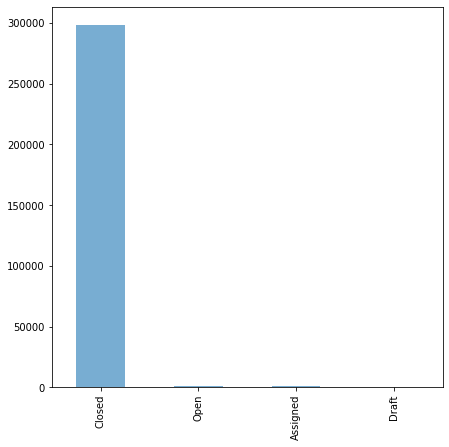

In [260]:
dataset['Status'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

We can observe that majority of the service requests status is closed and a small fraction of requests are "Open", "Assigned" or under "Draft"

### **Top Complaints**

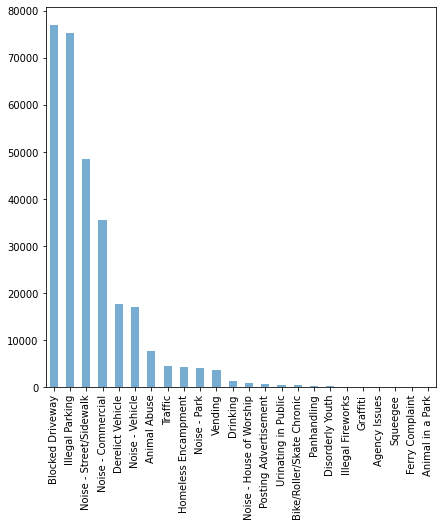

In [261]:
dataset['Complaint Type'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

We can Observe that majority of the complaint type falls under "Blocked Driveway" or "Illegal Parking" or "Noise - Street/Sidewalk" Category

### **Descriptor**

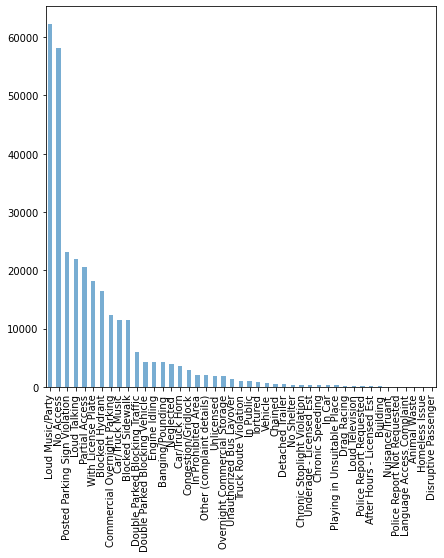

In [262]:
dataset['Descriptor'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

We can observe that majority of the compaint description falls under "Loud music/Party" and "No Access" Category

### **Agency Names**

In [263]:
dataset['Agency Name'].value_counts()

New York City Police Department    300690
Internal Affairs Bureau                 6
NYPD                                    2
Name: Agency Name, dtype: int64

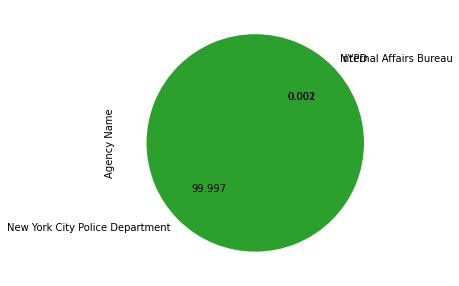

In [264]:
dataset['Agency Name'].groupby(dataset['Agency Name']).size().plot(kind='pie', autopct='%.3f', startangle=45)
plt.show()

We can see that there Majority of the complaints are registed with "New York City Police Department" and a fraction of the cases are registered with "Internal Affairs Bureau" and "NYPD"

### **Borough**

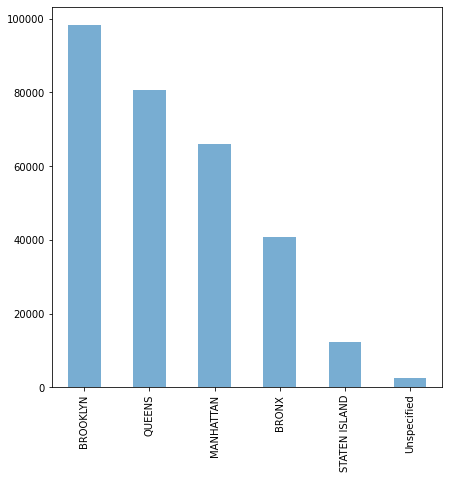

In [265]:
dataset['Borough'].value_counts().plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.show()

We can observe that the cases is highest in Brooklyn district

## **Request Date vs Frequency**

Plotting the frequency of daily service requests

In [266]:
import datetime as dt

In [267]:
daily_dates = pd.DataFrame(dataset['Created Date'].dt.date).reset_index()

In [268]:
daily_dates = daily_dates.groupby(['Created Date']).count().reset_index()

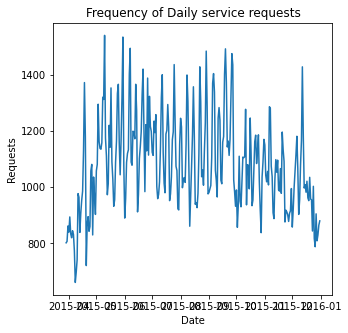

In [269]:
plt.plot(daily_dates['Created Date'], daily_dates['index'])
plt.rcParams['figure.figsize'] = [15, 15]
plt.title('Frequency of Daily service requests')
plt.xlabel('Date')
plt.ylabel('Requests')
plt.show()

We can observed that the frequecy of requests increased during the period of April 2015 and January 2016 and then decreased

## **Created Hour**

In [270]:
created_hour = pd.DataFrame(dataset['Created Date'].dt.hour).reset_index()

In [271]:
created_hour = created_hour.groupby(['Created Date']).count().reset_index()

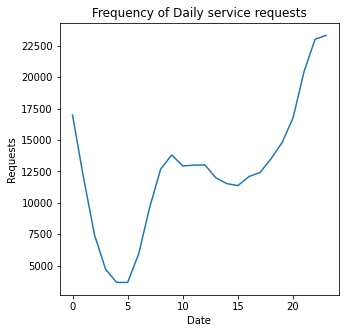

In [293]:
plt.plot(created_hour['Created Date'], created_hour['index'])
plt.rcParams['figure.figsize'] = [10,8]
plt.title('Frequency of Daily service requests')
plt.xlabel('Date')
plt.ylabel('Requests')
plt.show()

We can observe that the frequency of requests is highest around 12 AM and lowest around 3-5 AM.

# **Average Request Closing Time**

In [273]:
print("Mean Request Closing Time: ", dataset['Request_Closing_Time'].mean())

Mean Request Closing Time:  0 days 04:18:49.770005121


# **Hypothesis Testing**

## **1. Whether the average response time across complaint types is similar or not (overall)**

Converting Request_Closing_Time to minutes for more precise results.

In [274]:
dataset['Request_Closing_Minutes'] = dataset['Request_Closing_Time'].astype('timedelta64[m]')+1

In [275]:
dataset['Request_Closing_Minutes'].head()

0     56.0
1     87.0
2    292.0
3    466.0
4    208.0
Name: Request_Closing_Minutes, dtype: float64

distribution of our Request_Closing_Minutes data for 'Noise - Street/Sidewalk' complaint type.

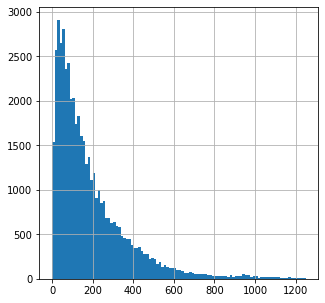

In [276]:
dataset = dataset[dataset['Complaint Type'].notnull()]
original = dataset[dataset['Complaint Type']=='Noise - Street/Sidewalk']['Request_Closing_Minutes']
plt.rcParams['figure.figsize'] = [5,5]
original.hist(bins=100,range=(0,1250))
plt.show()

In [277]:
original.describe()

count    48612.000000
mean       207.739694
std        325.702552
min          3.000000
25%         61.000000
50%        133.000000
75%        260.000000
max      35573.000000
Name: Request_Closing_Minutes, dtype: float64

In [278]:
import numpy as np

In [279]:
data = {}
for complaint in dataset['Complaint Type'].unique():
  data[complaint] = np.log(dataset[dataset['Complaint Type']==complaint]['Request_Closing_Minutes'])

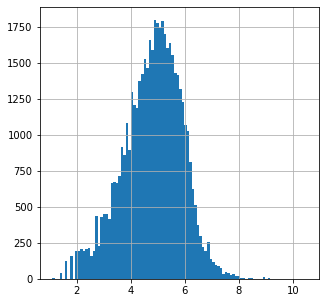

In [280]:
data['Noise - Street/Sidewalk'].hist(bins=100)
plt.show()

In [281]:
for complaint in data.keys():
    print(complaint, ':\t', data[complaint].std())

Noise - Street/Sidewalk :	 1.0874813672401784
Blocked Driveway :	 0.9691386274397016
Illegal Parking :	 1.0669597020557937
Derelict Vehicle :	 1.2457252611009721
Noise - Commercial :	 1.0763091176697792
Noise - House of Worship :	 1.157426484535852
Posting Advertisement :	 1.193586677415039
Noise - Vehicle :	 1.0642536735565946
Animal Abuse :	 1.0349692057796114
Vending :	 1.0985617859387775
Traffic :	 1.1693690064170892
Drinking :	 1.0354164293056451
Bike/Roller/Skate Chronic :	 1.1559861346703018
Panhandling :	 1.0545634443510679
Noise - Park :	 1.1040725556180655
Homeless Encampment :	 1.0212999697423413
Urinating in Public :	 1.0896898895618483
Graffiti :	 1.0581967861803852
Disorderly Youth :	 1.0276748370244453
Illegal Fireworks :	 1.1905406895067956
Ferry Complaint :	 0.5624511395192774
Agency Issues :	 0.8285353314860184
Squeegee :	 0.8469384425802964
Animal in a Park :	 nan


### **ANOVA Test (Analysis of Variance)**

as we have to compare the means of more than two groups.

**Conditions for test:**

*   All distributions must follow a normal distributions curve. We have verified this after the log transformation.
*   Standard deviation for all groups must be same. Above output proves that this is true.
*   All samples are drawn independently of each other.


**Null Hypothesis:** Average response time for all the complaints type is similar.

**Alternate Hypothesis:** Average response time for all the complaints type is not similar.


**if p < alpha(0.05):** Reject Null Hypothesis, Average response time for all the complaints type is not similar.

**if p > alpha(0.05):** Fail to reject Null Hypothesis, Average response time for all the complaints type is similar.

In [282]:
from scipy.stats import f_oneway

In [294]:
stat, p = f_oneway(data['Blocked Driveway'],
                   data['Illegal Parking'],
                   data['Noise - Street/Sidewalk'],
                   data['Noise - Commercial'])

print('Statistics=%.3f, p=%.3f\n' % (stat, p))

print("Result: ", end=' ')
if p < 0.05:
     print('Different distributions (reject Null Hypothesis H0)')
else:
    print('Same distributions (fail to reject Null Hypothesis H0)')

Statistics=2583.941, p=0.000

Result:  Different distributions (reject Null Hypothesis H0)


## **2. Are the type of complaint or service requested and location related?**

To find the correlation between location and complaint types, we will consider below columns

1.   Complaint Type
2.   Borough
3.   Longitude
4.   Latitude
5.   City


In [284]:
dataset['City'].isnull().sum()

0

In [285]:
dataset = dataset[dataset['City'].notnull()]

In [286]:
dataset['City'].isnull().sum()

0

In [287]:
sample = dataset[['Complaint Type','Borough','Longitude','Latitude','City']]

In [288]:
sample.head()

,Complaint Type,Borough,Longitude,Latitude,City
0,Noise - Street/Sidewalk,MANHATTAN,-73.923501,40.865682,NEW YORK
1,Blocked Driveway,QUEENS,-73.915094,40.775945,ASTORIA
2,Blocked Driveway,BRONX,-73.888525,40.870325,BRONX
3,Illegal Parking,BRONX,-73.828379,40.835994,BRONX
4,Illegal Parking,QUEENS,-73.874170,40.733060,ELMHURST


converting the variables to categorical

In [289]:
from sklearn.preprocessing import LabelEncoder

In [290]:
le = LabelEncoder()
sample['City'] = le.fit_transform(sample['City'])
sample['Complaint Type'] = le.fit_transform(sample['Complaint Type'])
sample['Borough'] = le.fit_transform(sample['Borough'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [291]:
sample.head()

,Complaint Type,Borough,Longitude,Latitude,City
0,16,2,-73.923501,40.865682,33
1,4,3,-73.915094,40.775945,1
2,4,0,-73.888525,40.870325,6
3,12,0,-73.828379,40.835994,6
4,12,3,-73.874170,40.733060,13


In [292]:
sample.corr(method='pearson')

,Complaint Type,Borough,Longitude,Latitude,City
Complaint Type,1.000000,-0.057730,-0.182274,0.149257,0.095026
Borough,-0.057730,1.000000,0.021738,-0.239928,0.689435
Longitude,-0.182274,0.021738,1.000000,0.364812,-0.123322
Latitude,0.149257,-0.239928,0.364812,1.000000,0.000602
City,0.095026,0.689435,-0.123322,0.000602,1.000000


Clearly there is no realtion between Location and complaint type.